In [3]:
pwd

'd:\\Database_pythonK\\Chicago_Burglary'

## Data Terms of Use

“This site provides applications using data that has been modified for use from its original source, www.cityofchicago.org, the official website of the City of Chicago.  
The City of Chicago makes no claims as to the content, accuracy, timeliness, or completeness of any of the data provided at this site.  The data provided at this site is subject to change at any time.  
It is understood that the data provided at this site is being used at one’s own risk.”

We will be exploring the City of Chicago's Crime " Burglary" data set, which is part of their Open Data initiative.

# Analysis 
1- Fill out the doKMeans method to find and plot seven clusters and print out their centroids. These could be places a police officer investigates to check for on-going illegal activities.
2- Re-run your assignment a few times over, looking at your printed and plotted results. Then answer the following questions.
3- Note: If Pandas complains about your data, you can use dropna() on any row that has NANs in it

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
%matplotlib inline


In [5]:
bg = pd.read_csv('Burglary_Crimes_2001_to_Present.csv', sep=',')

In [6]:
bg.head(3)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224742,HY411435,9/5/2015 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,5,1168430.0,1850165.0,2015,2/10/2018 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)"
1,10224743,HY411629,9/4/2015 18:00,021XX W CHURCHILL ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,5,1161628.0,1912157.0,2015,2/10/2018 15:50,41.914636,-87.681631,"(41.914635603, -87.681630909)"
2,10224756,HY410094,7/8/2015 0:00,103XX S TORRENCE AVE,620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,10.0,51.0,5,1195508.0,1836950.0,2015,2/10/2018 15:50,41.707490,-87.559650,"(41.707490122, -87.559650325)"


In [7]:
bg.describe()

,ID,IUCR,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Latitude,Longitude
count,4.217370e+05,421737.000000,421737.000000,421734.000000,389259.000000,389177.000000,421737.0,4.201330e+05,4.201330e+05,421737.000000,420133.000000,420133.000000
mean,6.766652e+06,614.173454,1210.104162,11.554781,22.433937,39.003787,5.0,1.164752e+06,1.884125e+06,2009.317838,41.837632,-87.670995
std,3.220259e+06,7.111644,708.366854,7.025724,13.696140,22.214751,0.0,1.632465e+04,3.330347e+04,5.610892,0.091599,0.059279
min,1.310263e+06,610.000000,111.000000,1.000000,1.000000,1.000000,5.0,0.000000e+00,0.000000e+00,2001.000000,36.619446,-91.686566
25%,3.868676e+06,610.000000,623.000000,6.000000,10.000000,22.000000,5.0,1.153502e+06,1.856847e+06,2005.000000,41.762500,-87.711666
50%,6.933052e+06,610.000000,1021.000000,10.000000,21.000000,40.000000,5.0,1.165310e+06,1.879168e+06,2009.000000,41.823874,-87.668682
75%,9.283609e+06,620.000000,1811.000000,17.000000,34.000000,61.000000,5.0,1.176002e+06,1.913152e+06,2013.000000,41.917505,-87.630317
max,1.292367e+07,650.000000,2535.000000,31.000000,50.000000,77.000000,5.0,1.205119e+06,1.951573e+06,2022.000000,42.022710,-87.524529


In [8]:
bg.columns

Index(['ID', 'Case Number', 'Date', 'Block', 'IUCR', 'Primary Type',
       'Description', 'Location Description', 'Arrest', 'Domestic', 'Beat',
       'District', 'Ward', 'Community Area', 'FBI Code', 'X Coordinate',
       'Y Coordinate', 'Year', 'Updated On', 'Latitude', 'Longitude',
       'Location'],
      dtype='object')

In [9]:
bg.index

RangeIndex(start=0, stop=421737, step=1)

In [10]:
bg.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Let us get rid of any row that contains nans : # remove any row with nans

In [11]:
bg.dropna(axis=0)

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,10224742,HY411435,9/5/2015 10:55,082XX S LOOMIS BLVD,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,False,False,...,21.0,71.0,5,1168430.0,1850165.0,2015,2/10/2018 15:50,41.744379,-87.658431,"(41.744378879, -87.658430635)"
1,10224743,HY411629,9/4/2015 18:00,021XX W CHURCHILL ST,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE-GARAGE,False,False,...,32.0,24.0,5,1161628.0,1912157.0,2015,2/10/2018 15:50,41.914636,-87.681631,"(41.914635603, -87.681630909)"
2,10224756,HY410094,7/8/2015 0:00,103XX S TORRENCE AVE,620,BURGLARY,UNLAWFUL ENTRY,OTHER,False,False,...,10.0,51.0,5,1195508.0,1836950.0,2015,2/10/2018 15:50,41.707490,-87.559650,"(41.707490122, -87.559650325)"
3,10224757,HY411388,9/5/2015 9:55,088XX S PAULINA ST,610,BURGLARY,FORCIBLE ENTRY,RESIDENCE,True,False,...,21.0,71.0,5,1166554.0,1846067.0,2015,2/10/2018 15:50,41.733174,-87.665421,"(41.733173536, -87.665421067)"
4,10224773,HY411685,9/5/2015 7:00,029XX W FIFTH AVE,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,2.0,27.0,5,1156926.0,1899592.0,2015,2/10/2018 15:50,41.880253,-87.699247,"(41.880252868, -87.69924661)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421732,12758715,JF314608,6/1/2022 0:00,121XX S PRINCETON AVE,620,BURGLARY,UNLAWFUL ENTRY,RESIDENCE,False,False,...,34.0,53.0,5,1176473.0,1824340.0,2022,11/12/2022 15:46,41.673335,-87.629733,"(41.673334568, -87.629733426)"
421733,12744372,JF296932,6/28/2022 0:00,031XX N LARAMIE AVE,610,BURGLARY,FORCIBLE ENTRY,SMALL RETAIL STORE,False,False,...,30.0,19.0,5,1141159.0,1920198.0,2022,11/12/2022 15:46,41.937103,-87.756633,"(41.93710313, -87.756633218)"
421734,12760697,JF316944,7/14/2022 3:30,007XX W OAKDALE AVE,620,BURGLARY,UNLAWFUL ENTRY,APARTMENT,False,False,...,44.0,6.0,5,1170600.0,1919863.0,2022,11/12/2022 15:46,41.935589,-87.648443,"(41.935589428, -87.648443084)"
421735,12757403,JF313058,6/7/2022 3:21,009XX W LAKE ST,620,BURGLARY,UNLAWFUL ENTRY,SMALL RETAIL STORE,False,False,...,27.0,28.0,5,1170148.0,1901646.0,2022,11/12/2022 15:46,41.885611,-87.650637,"(41.88561086, -87.650637071)"


In [12]:
bg.dtypes

ID                        int64
Case Number              object
Date                     object
Block                    object
IUCR                      int64
Primary Type             object
Description              object
Location Description     object
Arrest                     bool
Domestic                   bool
Beat                      int64
District                float64
Ward                    float64
Community Area          float64
FBI Code                  int64
X Coordinate            float64
Y Coordinate            float64
Year                      int64
Updated On               object
Latitude                float64
Longitude               float64
Location                 object
dtype: object

Coerce the `Date` feature (which is currently a string object) into real date

In [13]:
bg.Date = pd.to_datetime(bg.Date, errors='coerce')

Display the `dtypes` 

In [14]:
bg.dtypes

ID                               int64
Case Number                     object
Date                    datetime64[ns]
Block                           object
IUCR                             int64
Primary Type                    object
Description                     object
Location Description            object
Arrest                            bool
Domestic                          bool
Beat                             int64
District                       float64
Ward                           float64
Community Area                 float64
FBI Code                         int64
X Coordinate                   float64
Y Coordinate                   float64
Year                             int64
Updated On                      object
Latitude                       float64
Longitude                      float64
Location                        object
dtype: object

In [15]:
def UseKMean(bg,centroids):
    # Let's plot your data with a '.' marker, a 0.4 alpha at the Longitude,
    # and Latitude locations in your dataset. Longitude = x, Latitude = y
    fig = plt.figure()
    plt.scatter(centroids[:,0], centroids[:,1], marker='x', c='red', alpha=0.4, linewidths=3, s=169, label='Centroids')
    plt.scatter(bg.Longitude, bg.Latitude, marker='.', alpha=0.4, label='Data points')
    plt.title('Chicago Burglary Crimes since 2001', c='red')
    plt.xlabel('Longitude',c='green')
    plt.ylabel('Latitude', c='violet')
    plt.legend()  


In [16]:
bg= bg.filter(items=['Longitude', 'Latitude'])

In [17]:
print(bg)

        Longitude   Latitude
0      -87.658431  41.744379
1      -87.681631  41.914636
2      -87.559650  41.707490
3      -87.665421  41.733174
4      -87.699247  41.880253
...           ...        ...
421732 -87.629733  41.673335
421733 -87.756633  41.937103
421734 -87.648443  41.935589
421735 -87.650637  41.885611
421736 -87.591989  41.757776

[421737 rows x 2 columns]


In [18]:
bg.dropna(axis=0, inplace =True)

In [19]:
bg=bg.head(50)

In [20]:
print(bg)

    Longitude   Latitude
0  -87.658431  41.744379
1  -87.681631  41.914636
2  -87.559650  41.707490
3  -87.665421  41.733174
4  -87.699247  41.880253
5  -87.619013  41.694444
6  -87.751896  41.969801
7  -87.664607  41.926116
8  -87.782871  41.995264
9  -87.670846  41.800627
10 -87.727114  41.936594
11 -87.638092  41.671453
12 -87.562412  41.740273
13 -87.601124  41.749500
14 -87.671705  41.906697
15 -87.645185  41.843048
16 -87.601106  41.749503
17 -87.624026  41.792342
18 -87.596516  41.653732
19 -87.629683  41.713879
20 -87.570948  41.716545
22 -87.687537  41.921697
23 -87.560092  41.747335
24 -87.664050  41.773167
25 -87.704829  41.882808
26 -87.682684  41.832989
27 -87.642310  41.852701
28 -87.731496  41.784983
29 -87.695696  41.823677
30 -87.834206  41.950735
31 -87.713899  41.855807
32 -87.692297  41.996753
33 -87.692715  41.997680
34 -87.692297  41.996772
35 -87.652272  41.871372
36 -87.709925  41.756550
37 -87.660456  41.967186
39 -87.641610  41.808934
40 -87.667562  41.753944


 I will use K-Means to try and find six cluster centers in this bg. I will call my kmeans model `burglary`.

In [21]:
burglary= KMeans(n_clusters=6)

In [22]:
burglary.fit(bg)

KMeans(n_clusters=6)

In [23]:
labels=burglary.predict(bg)

I can print and plot the centroids now :

In [24]:
centroids = burglary.cluster_centers_

In [25]:
print(centroids) 

[[-87.68444133  41.98959785]
 [-87.6603648   41.76361428]
 [-87.58577645  41.71618   ]
 [-87.7601461   41.95405435]
 [-87.66956027  41.89190903]
 [-87.69476157  41.82766674]]


# Print & Plot your data

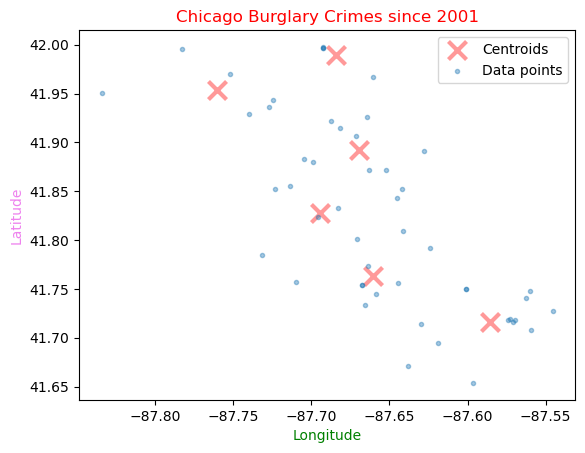

In [26]:
UseKMean(bg,centroids)

In [27]:
bg= bg.filter(items=['Date'> '2011-01-01'])

In [28]:
print(bg,centroids)

Empty DataFrame
Columns: []
Index: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51] [[-87.68444133  41.98959785]
 [-87.6603648   41.76361428]
 [-87.58577645  41.71618   ]
 [-87.7601461   41.95405435]
 [-87.66956027  41.89190903]
 [-87.69476157  41.82766674]]
